## Welcome to the Browser Wars (1995 - )
<p><img src="https://assets.datacamp.com/production/project_1172/img/browser.png" alt="Browser on desktop, tablet, and phone"></p>
<p>In the mid 1990s, the First Browser War began with Netscape Navigator and Microsoft Internet Explorer fighting for dominance. By 2001, Internet Explorer was the clear winner, but it was not long before the Second Browser Wars began (2004-2017). This coincided with the rise of smartphones, which emphasized the need and competitiveness for more mobile-friendly versions of browsers. <a href="https://en.wikipedia.org/wiki/Browser_wars">[1]</a></p>
<p>In this notebook, we'll analyze the worldwide popularity of browsers over time using Google Trends. Although this won't give us direct market share figures, we can use Google Trends to get a sense of interest of a given browser over time and how that interest compares to other browsers. In particular, we will be looking at five major players over the past two decades: Mozilla Firefox (2002-), Apple's Safari (2002-), Google Chrome (2008-), Microsoft Internet Explorer (1995-2020), and Opera (1995-).</p>
<p>The dataset you will use was downloaded as a CSV from this <a href="https://trends.google.com/trends/explore?date=all&q=%2Fm%2F01dyhm,%2Fm%2F0168s_,%2Fm%2F04j7cyf,%2Fm%2F03xw0,%2Fm%2F01z7gs">Google Trends query</a> in mid-October of 2020. Here are the details:</p>
<div style="background-color: #efebe4; color: #05192d; text-align:left; vertical-align: middle; padding: 15px 25px 15px 25px; line-height: 1.6;">
    <div style="font-size:20px"><b>datasets/worldwide_browser_trends.csv</b></div>
This is a time series indexed by month with the search interest for each browser.
<ul>
    <li><b>Month:</b> each month from 2004-01 to 2020-10</li>
    <li><b>Firefox:</b> search interest for Firefox</li>
    <li><b>Safari:</b> search interest for Safari</li>
    <li><b>Google Chrome:</b> search interest for Chrome</li>
    <li><b>Internet Explorer:</b> search interest for Internet Explorer</li>
    <li><b>Opera:</b> search interest for Opera</li>
</ul>
</div>
<p>Google defines the values of search interest as:</p>
<blockquote>
  <p>Numbers represent search interest relative to the highest point on the chart for the given region and time. A value of 100 is the peak popularity for the term. A value of 50 means that the term is half as popular. A score of 0 means there was not enough data for this term.</p>
</blockquote>
<p>Best of luck and may the best browser win!</p>

In [34]:
# Loading pandas , reading dataset from source and looking at head of df .
import pandas as pd

filepath ='datasets/worldwide_browser_trends.csv'

df = pd.read_csv(filepath)
df.head()

,Month,Firefox,Safari,Google Chrome,Internet Explorer,Opera
0,2004-01,12,2,2,37,9
1,2004-02,20,2,2,39,9
2,2004-03,18,2,2,34,8
3,2004-04,20,2,2,33,9
4,2004-05,20,2,2,35,9


<AxesSubplot:>

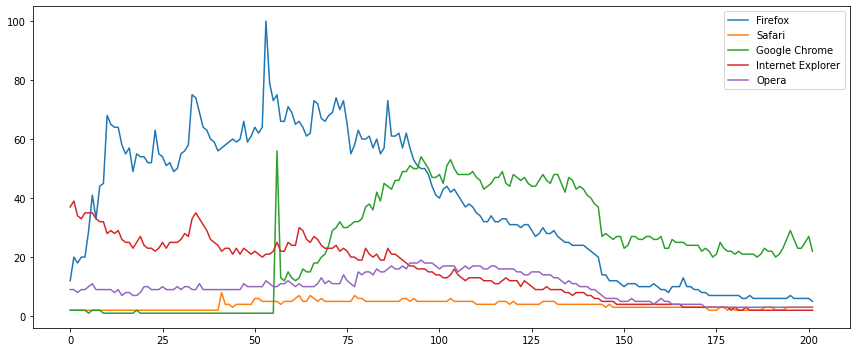

In [35]:
# Original plot of dataframe
df.plot(figsize = (12 ,5))

In [36]:
# Make column names easier to work with
df.columns = ['Month','Firefox' ,'Safari' ,'Chrome' ,'Explorer' ,'Opera']

# Inspect data
df.head()

,Month,Firefox,Safari,Chrome,Explorer,Opera
0,2004-01,12,2,2,37,9
1,2004-02,20,2,2,39,9
2,2004-03,18,2,2,34,8
3,2004-04,20,2,2,33,9
4,2004-05,20,2,2,35,9


In [37]:
# Inspection of data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Month     202 non-null    object
 1   Firefox   202 non-null    int64 
 2   Safari    202 non-null    int64 
 3   Chrome    202 non-null    int64 
 4   Explorer  202 non-null    int64 
 5   Opera     202 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 9.6+ KB


In [38]:
# Let convert Month column's data type from object to datetime
df.Month = pd.to_datetime(df.Month)

# Inspect data types and data
df.head()

,Month,Firefox,Safari,Chrome,Explorer,Opera
0,2004-01-01,12,2,2,37,9
1,2004-02-01,20,2,2,39,9
2,2004-03-01,18,2,2,34,8
3,2004-04-01,20,2,2,33,9
4,2004-05-01,20,2,2,35,9


In [39]:
# Set month as DataFrame index
df = df.set_index('Month')

# Inspection of the data
df.head()

,Firefox,Safari,Chrome,Explorer,Opera
Month,,,,,
2004-01-01,12,2,2,37,9
2004-02-01,20,2,2,39,9
2004-03-01,18,2,2,34,8
2004-04-01,20,2,2,33,9
2004-05-01,20,2,2,35,9


In [40]:
# OR we can simply index Month column as datetime with one line like below ;
# Import the dataset and configure it as a time series

#df = pd.read_csv("datasets/worldwide_browser_trends.csv",parse_dates=['Month'], index_col='Month')

Text(0, 0.5, 'Search Interest')

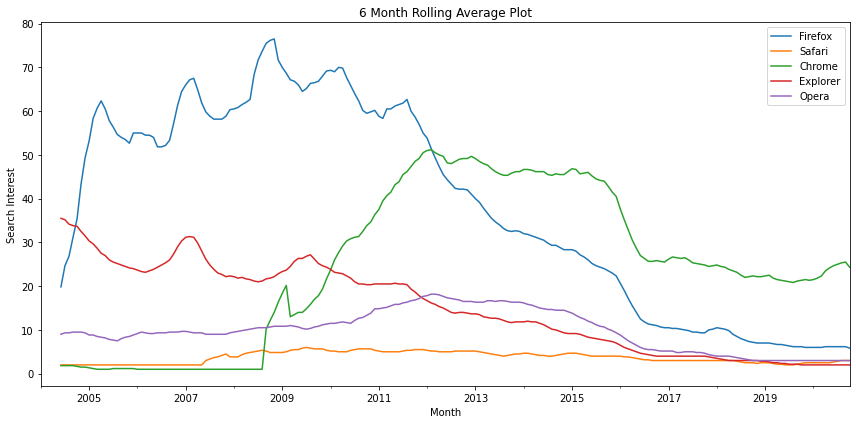

In [41]:
# Smooth the data with rolling means for 6 months
rolling_six = df.rolling(window=6).mean()
ax = rolling_six.plot(title="6 Month Rolling Average Plot" ,figsize=(12,6) )
ax.set_ylabel("Search Interest")

In [42]:
# Splitting data by date that after 2009 
new_df = df.loc['2009' : ,]
new_df.head(20)

,Firefox,Safari,Chrome,Explorer,Opera
Month,,,,,
2009-01-01,69,5,13,24,11
2009-02-01,65,6,12,24,10
2009-03-01,66,7,13,30,11
2009-04-01,64,5,16,29,10
2009-05-01,61,5,15,26,10
2009-06-01,62,7,15,25,10
2009-07-01,73,6,18,27,10
2009-08-01,72,5,18,26,11
2009-09-01,67,6,20,24,13


In [43]:
# to get  percentage change from the previous quarter I used  pct_change() built-in pandas func. 
#shifted 3 previous months to get previous quarter's value and multiply by 100 for percentage value
pct_change_quarterly = new_df.pct_change(periods = 3 , fill_method = 'ffill')*100 
pct_change_quarterly.head(10)

,Firefox,Safari,Chrome,Explorer,Opera
Month,,,,,
2009-01-01,NaN,NaN,NaN,NaN,NaN
2009-02-01,NaN,NaN,NaN,NaN,NaN
2009-03-01,NaN,NaN,NaN,NaN,NaN
2009-04-01,-7.246377,0.000000,23.076923,20.833333,-9.090909
2009-05-01,-6.153846,-16.666667,25.000000,8.333333,0.000000
2009-06-01,-6.060606,0.000000,15.384615,-16.666667,-9.090909
2009-07-01,14.062500,20.000000,12.500000,-6.896552,0.000000
2009-08-01,18.032787,0.000000,20.000000,0.000000,10.000000
2009-09-01,8.064516,-14.285714,33.333333,-4.000000,30.000000


Text(0, 0.5, 'Percentage Change')

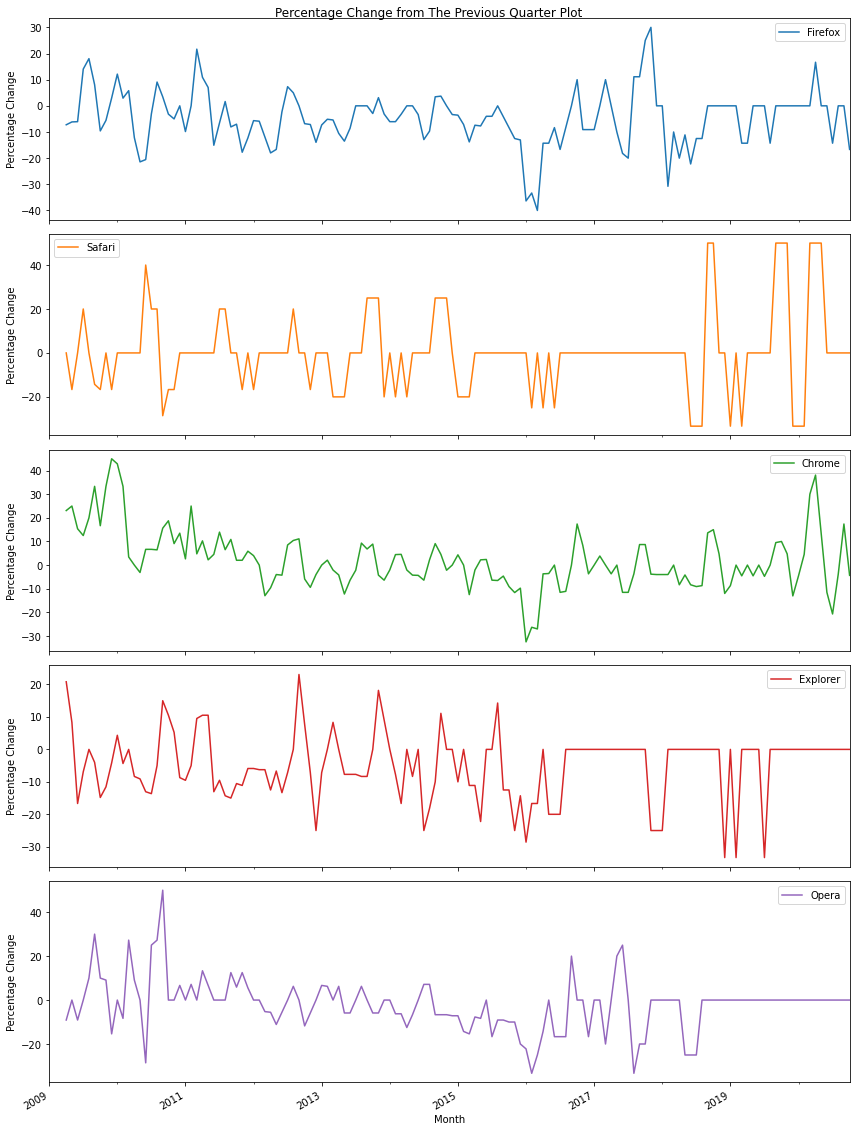

In [44]:
# I used ax which is matplotlib return object to use ylabeling for the plot.
ax = pct_change_quarterly.plot(subplots=True, figsize=(12,16) , title="Percentage Change from The Previous Quarter Plot")
ax[0].set_ylabel('Percentage Change')
ax[1].set_ylabel('Percentage Change')
ax[2].set_ylabel('Percentage Change')
ax[3].set_ylabel('Percentage Change')
ax[4].set_ylabel('Percentage Change')

In [45]:
# Initializing chrome_trends DataFrame by creating empty one.
chrome_trends = pd.DataFrame()

In [46]:
# By concatinating spesific year's data as column to initialized DataFrame and month as indexed .
for year in ['2009', '2012', '2015', '2018']:
    chrome_trends_per_year = new_df.loc[year, ['Chrome']].reset_index(drop=True)
    chrome_trends_per_year.rename(columns={'Chrome': year}, inplace=True)
    chrome_trends = pd.concat([chrome_trends, chrome_trends_per_year], axis=1)
    
chrome_trends.head(10)

,2009,2012,2015,2018
0,13,52,48,24
1,12,50,45,24
2,13,47,42,24
3,16,47,47,22
4,15,48,46,23
5,15,45,43,22
6,18,51,44,20
7,18,53,43,21
8,20,50,41,25
9,21,48,40,23


Text(0, 0.5, 'Search Interest')

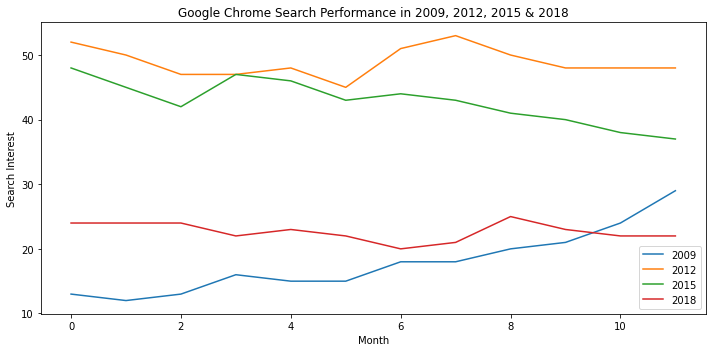

In [47]:
ax = chrome_trends.plot(title="Google Chrome Search Performance in 2009, 2012, 2015 & 2018" , figsize = (10 ,5))
ax.set_xlabel('Month')
ax.set_ylabel('Search Interest')

Text(0, 0.5, 'Search Interest')

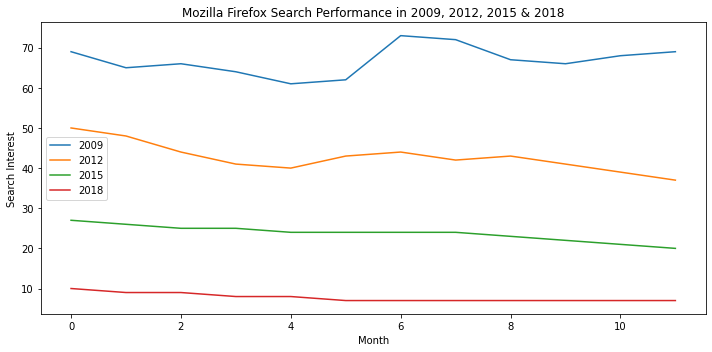

In [48]:
# Initializing firefox_trends DataFrame by creating empty one.
firefox_trends = pd.DataFrame()
# By concatinating spesific year's data as column to initialized DataFrame and month as indexed .
for year in ['2009', '2012', '2015', '2018']:
    firefox_trends_per_year = new_df.loc[year, ['Firefox']].reset_index(drop=True)
    firefox_trends_per_year.rename(columns={'Firefox': year}, inplace=True)
    firefox_trends = pd.concat([firefox_trends, firefox_trends_per_year], axis=1)
    


ax = firefox_trends.plot(title="Mozilla Firefox Search Performance in 2009, 2012, 2015 & 2018" , figsize = (10 ,5))
ax.set_xlabel('Month')
ax.set_ylabel('Search Interest')

Text(0, 0.5, 'Search Interest')

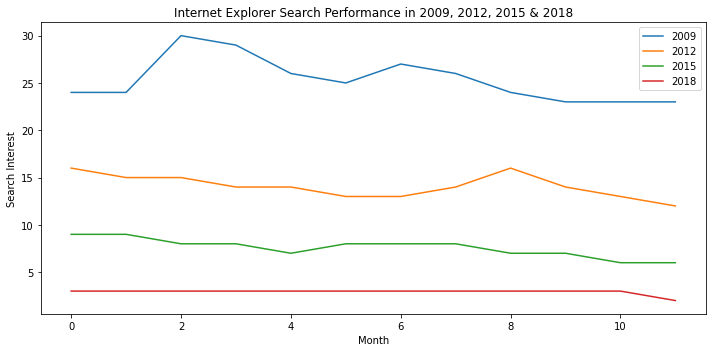

In [49]:
# Initializing internet_explorer_trends DataFrame by creating empty one.
internet_explorer_trends = pd.DataFrame()
# By concatinating spesific year's data as column to initialized DataFrame and month as indexed .
for year in ['2009', '2012', '2015', '2018']:
    internet_explorer_trends_per_year = new_df.loc[year, ['Explorer']].reset_index(drop=True)
    internet_explorer_trends_per_year.rename(columns={'Explorer': year}, inplace=True)
    internet_explorer_trends = pd.concat([internet_explorer_trends, internet_explorer_trends_per_year], axis=1)
    


ax = internet_explorer_trends.plot(title="Internet Explorer Search Performance in 2009, 2012, 2015 & 2018" , figsize = (10 ,5))
ax.set_xlabel('Month')
ax.set_ylabel('Search Interest')